In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType

getBlinded = Blinders(FitType.Omega_a, 'memes')

Welcome to JupyROOT 6.18/04


In [5]:
chain = r.TChain("farline/eventTree");
chain.Add("./9day/gm2offline_ana_233128_16528.00035.root");
chain.Add("./9day/gm2offline_ana_233130_16535.00353.root");
chain.Add("./9day/gm2offline_ana_233134_16482.00307.root");
chain.Add("./9day/gm2offline_ana_233136_16528.00161.root");

In [6]:
"""
Define the blinded wiggle function used for fitting
"""

def blinded_wiggle(x, p):
    norm = p[0]
    life = p[1]
    asym = p[2]
    R = p[3]
    phi = p[4]
    
    time = x[0]
    omega = getBlinded.paramToFreq(R)
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi))

func = r.TF1("func", blinded_wiggle, 30, 600, 5)
func.SetParNames('N', '#tau', 'A', 'R( #omega_{a} )', '#phi')
func.SetParameters(5000, 64.4, 0.4, 0, 5.2)
func.SetLineColor(3)
func.SetNpx(10000)

In [11]:
"""
Create a list of histograms of each Calorimeter energy vs time
"""

rows = []
for i in range(1, 25):    
    hist = r.TH2D("calo_"+str(i),
                  "Energy vs Time for Calorimeter "+str(i)+"; Time [#mus]; Energy [MeV]",
                  4700, 0, 700, 100, 0, 6000)

    chain.Draw("energy:time*1.25/1000.>>calo_"+str(i), "caloNum == "+str(i), "goff")
    rows.append(hist.Clone("calo_"+str(i)))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


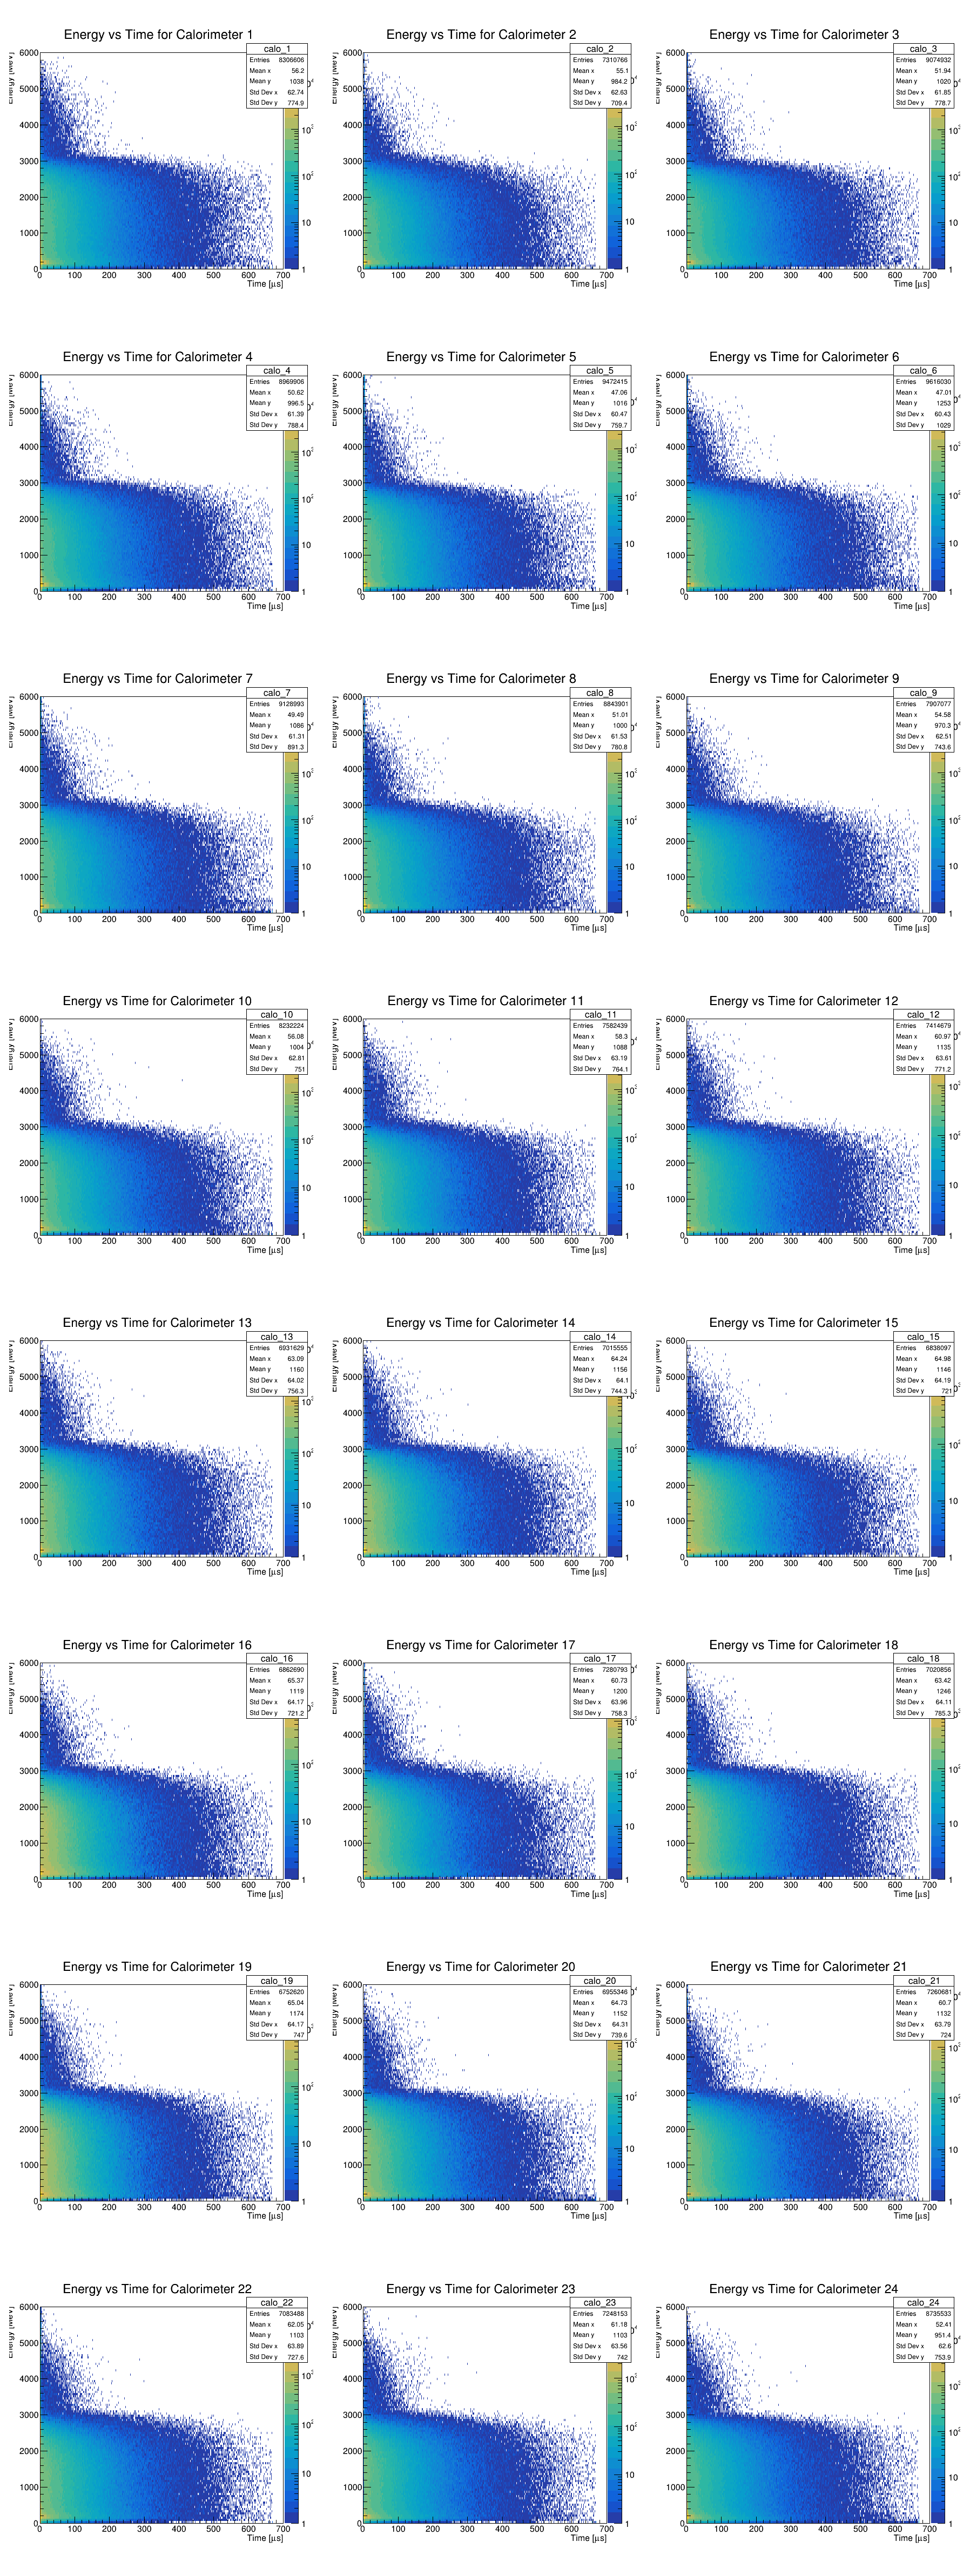

In [12]:
"""
Plot the histograms
"""
c = r.TCanvas("c","c", 1800, 4800)
c.Divide(3,8)

for i, hist in enumerate(rows):
    c.cd(i+1)
    hist.Draw("colz")
    r.gPad.SetLogz()

c.Draw()